In [1]:
% matplotlib inline
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.grid_search import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import RandomizedPCA as PCA
from sklearn.dummy import DummyClassifier

def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
    plt.clf()
    plt.imshow(confusion_matrix(y_test, clf.predict(X_test)),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.show()

def get_n_comp_expl_var(variance):
    """Returns PCA components needed to explain given percentage of variance"""
    for i in range(100):
        pca = PCA(n_components=i)
        pca.fit(X)
        suma = pca.explained_variance_ratio_.sum()
        if suma >= variance:
            return i, pca


In [2]:
df = pd.read_csv('../TP5/data/train.csv')

X = df.ix[:,1:-1].values
y = df['target']

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25)

#### Establecemos un baseline con un DummyClassifier (performance pobre)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       473
          1       0.26      1.00      0.42      4099
          2       0.00      0.00      0.00      2007
          3       0.00      0.00      0.00       689
          4       0.00      0.00      0.00       669
          5       0.00      0.00      0.00      3521
          6       0.00      0.00      0.00       725
          7       0.00      0.00      0.00      2077
          8       0.00      0.00      0.00      1210

avg / total       0.07      0.26      0.11     15470

0.264964447317


/home/bruno/.virtualenvs/dss/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


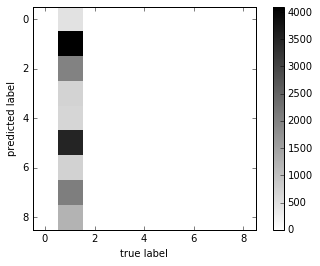

In [3]:
dummy = DummyClassifier(strategy='most_frequent',random_state=0).fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print classification_report(y_test, y_pred_dummy)
print dummy.score(X_test, y_test)
plot_matrix(dummy, X_test, y_test)

#### Probamos un Árbol (ETC) sin personalizar parámetros

In [ ]:
etc_1 = ExtraTreesClassifier(n_estimators=100, max_features=0.2, n_jobs=2)
etc_1.fit(X_train, y_train)
y_pred_etc_1 = etc_1.predict(X_test) 

In [ ]:
print classification_report(y_test, y_pred_etc_1)
print etc_1.score(X_test, y_test)
plot_matrix(etc_1, X_test, y_test)

#### Hacemos un GridSearch para buscar los mejores parámetros para nuestro clasificador

In [ ]:
parameters = {'max_features':np.arange(0.02,0.5,0.1), 'n_estimators':[100,400]}
#clf = ExtraTreesClassifier()
#clf = GridSearchCV(clf, parameters)
#clf.fit(X_train, y_train)
#print clf.best_score_
#print clf.best_params_

#### Creamos un clasificador con los parámetros indicados por el GridSearch 
#### {'max_features': 0.42000000000000004, 'n_estimators': 400}

In [ ]:
#This one takes a while
#etc_2 = ExtraTreesClassifier(max_features=0.42, n_estimators=400, n_jobs=2) # score = 0.82 - Mas tiempo de proc.
etc_2 = ExtraTreesClassifier(max_features=0.42, n_estimators=100, n_jobs=2) # score = 0.81 - Menos tiempo de proc.
etc_2.fit(X_train, y_train)
y_pred_etc_2 = etc_2.predict(X_test)

In [ ]:
print classification_report(y_pred_etc_2, y_test)
print etc_2.score(X_test, y_test)
plot_matrix(etc_2, X_test, y_test)

#### Features más relevantes

             precision    recall  f1-score   support

          0       0.40      0.71      0.51       273
          1       0.88      0.68      0.77      5264
          2       0.43      0.60      0.50      1453
          3       0.29      0.89      0.43       219
          4       0.96      0.97      0.96       678
          5       0.94      0.93      0.93      3443
          6       0.62      0.77      0.69       572
          7       0.93      0.87      0.90      2284
          8       0.86      0.85      0.85      1284

avg / total       0.83      0.79      0.80     15470

0.79127343245


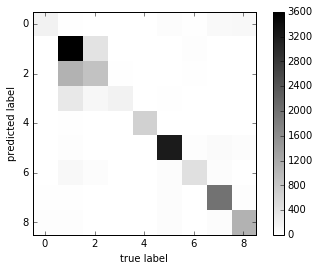

In [5]:
#n_components = 27 #explicamos el 80% de la variabilidad
#n_components = 43 #explicamos el 90% de la variabilidad
n_components = 57 #explicamos el 95,2287597498% de la variabilidad
pca = PCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)

X_pca_scaler = preprocessing.MinMaxScaler()
X_pca_scaled = X_pca_scaler.fit_transform(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X_pca_scaled.astype(np.float32), 
                                                    y_encoded, test_size=0.25)

etc_3 = ExtraTreesClassifier(max_features=0.42, n_estimators=400, n_jobs=2)
etc_3.fit(X_train, y_train)
y_pred_etc_3 = etc_3.predict(X_test)
    
print classification_report(y_pred_etc_3, y_test)
print etc_3.score(X_test, y_test) #100 estimadores = 0.793148028442 - 400 estimadores = 0.79127343245
plot_matrix(etc_3, X_test, y_test)

#### Los siguientes features explican el 90% de la variabilidad

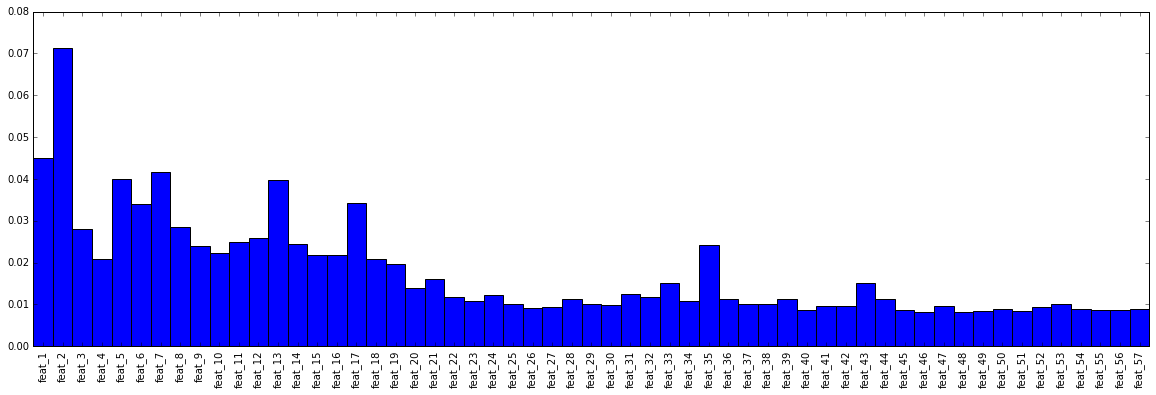

0.071384239604 feat_2
0.0449766066111 feat_1
0.0417126163328 feat_7
0.0400561159175 feat_5
0.0396259050342 feat_13
0.034224540406 feat_17
0.0340558873748 feat_6
0.0284388301229 feat_8
0.0279981213942 feat_3
0.0257795621099 feat_12
0.0249767435946 feat_11
0.0243980349653 feat_14
0.0241556479177 feat_35
0.0238794547378 feat_9
0.0222735783807 feat_10
0.0218834083636 feat_16
0.0217831922805 feat_15
0.0209100752587 feat_4
0.0207920343132 feat_18
0.0197218752649 feat_19
0.0161559061506 feat_21
0.0151651886713 feat_43
0.0151115012985 feat_33
0.0138302471516 feat_20
0.0125836938739 feat_31
0.0122925446117 feat_24
0.0118722891092 feat_22
0.0117347342232 feat_32
0.0113894500228 feat_44
0.0113545284322 feat_28
0.0112617948795 feat_39
0.0112281507804 feat_36
0.0107781043108 feat_23
0.0107732915043 feat_34
0.010213112912 feat_37
0.010082861396 feat_25
0.0100254635522 feat_29
0.0100220302451 feat_38
0.0100173392902 feat_53
0.00985171847575 feat_30
0.00974104808274 feat_47
0.00966211652657 feat_41
0.

In [6]:
importances = etc_3.feature_importances_

text = map(lambda i: df.columns[1:-1][i], range(n_components))
plt.figure(figsize=(20, 6))
plt.bar(range(n_components), height=importances,  width=1.)
plt.xticks(np.arange(0.5, n_components, 1.), text, rotation=90)
plt.xlim((0, n_components))
plt.show()

indices = np.argsort(importances)[::-1]
for i in range(n_components):
    print importances[indices[i]], df.columns[1:-1][indices[i]]